In [1]:
import os
import time
import requests
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from bs4 import BeautifulSoup
from datetime import datetime

In [2]:
# 현재 작업 디렉토리 경로 얻기
current_directory = os.getcwd()
# 나눔바른고딕 글꼴 파일 경로 지정
font_path = os.path.join("NanumBarunGothic.ttf")

# 글꼴이 있는지 확인
if os.path.exists(font_path):
    # 폰트 추가
    fm.fontManager.addfont(font_path)

    # 캐시를 새로 고치지 않고 직접 폰트 설정
    font_prop = fm.FontProperties(fname=font_path)
    plt.rc("font", family=font_prop.get_name())
    plt.rcParams["axes.unicode_minus"] = False  # 마이너스 부호 출력 설정

In [48]:
df = pd.read_csv('yes24_bestseller_data_final.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13620 entries, 0 to 13619
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          13620 non-null  int64  
 1   Month         13620 non-null  int64  
 2   Category      13620 non-null  object 
 3   Title         13620 non-null  object 
 4   Author        13620 non-null  object 
 5   Publisher     13620 non-null  object 
 6   Price         13620 non-null  int64  
 7   Publish_Date  13620 non-null  object 
 8   Sales_Index   13620 non-null  int64  
 9   Rating        13620 non-null  float64
 10  Age_Scores    13620 non-null  object 
 11  Pages         13572 non-null  object 
 12  Keywords      13620 non-null  object 
 13  Gender        13620 non-null  int64  
 14  Age           13620 non-null  int64  
 15  month         13620 non-null  int64  
dtypes: float64(1), int64(7), object(8)
memory usage: 1.7+ MB


In [33]:
df.head()

,Year,Month,Category,Title,Author,Publisher,Price,Publish_Date,Sales_Index,Rating,Age_Scores,Pages,Keywords,Gender,Age,month
0,2024,1,가정과 살림,나는 다정한 관찰자가 되기로 했다,이은경 저,서교책방,16020,2024년 05월,237453,9.7,"{'10대': 0.0, '20대': 10.0, '30대': 9.0, '40대': 9...",288,"['#엄마가된다는것', '#엄마는처음이라', '#초보엄마', '#자녀교육']",1,10,6
1,2024,1,가정과 살림,성심당 케이크 레시피,안종섭 저,비앤씨월드,18000,2024년 05월,3060,9.1,{},228,"['#레시피', '#맛집레시피', '#디저트레시피북', '#베이킹', '#홈베이킹']",1,10,6
2,2024,1,가정과 살림,조이 오브 쿠킹,"이르마 S. 롬바우어, 존 베커, 메건 스콧 저/구계원 역",세미콜론,69300,2024년 02월,2076,9.8,{},"1,280","['#도시락레시피', '#반찬고민', '#간편요리', '#자취요리', '#집반찬']",1,10,6
3,2024,1,가정과 살림,10분 완성 초간단 도시락 레시피 100,오민주 저,시원북스,16020,2024년 02월,7914,9.9,"{'10대': 0.0, '20대': 0.0, '30대': 10.0, '40대': 9...",260,"['#크레마클럽에있어요', '#새해결심', '#집밥레시피', '#자취요리', '#싸...",1,10,6
4,2024,1,가정과 살림,뿐이 토핑 이유식,정주희 저/이수진 감수,서사원,26820,2024년 03월,89208,9.8,"{'10대': 0.0, '20대': 0.0, '30대': 9.0, '40대': 10...",640,"['#국민육아템', '#초보엄마', '#간편이유식']",1,20,6


In [5]:
df['Category'].value_counts()

Category
소설/시/희곡     1842
인문          1740
자기계발        1638
경제 경영       1476
가정과 살림      1368
건강 취미       1344
자연과학        1332
유아          1206
역사          1080
만화/라이트노벨     594
Name: count, dtype: int64

In [31]:
def plot_sales_index_by_gender(df, input_age, input_category):
    # 나이대를 10단위로 매핑 (예: 15 -> 10, 25 -> 20)
    if input_age < 10:
        print("10대 이상의 나이를 입력해주세요")
        return
    elif input_age < 20:
        mapped_age = 10
    elif input_age < 30:
        mapped_age = 20
    elif input_age < 40:
        mapped_age = 30
    elif input_age < 50:
        mapped_age = 40
    elif input_age < 60:
        mapped_age = 50
    elif input_age < 120:
        mapped_age = 60
    else:
        print("올바른 나이를 입력해주세요.")
        return
    
    # 나이대 필터링
    age_filtered_df = df[df['Age'] == mapped_age]

    # 카테고리 필터링
    category_filtered_df = age_filtered_df[age_filtered_df['Category'] == input_category]

    # 성별에 따른 Sales_Index 합계 계산
    sales_summary_by_gender = category_filtered_df.groupby('Gender')['Sales_Index'].sum()

    # 성별 라벨 설정
    gender_labels = ['남자', '여자']

    # 파이차트 그리기
    plt.figure(figsize=(8, 6))
    sales_summary_by_gender.plot.pie(labels=gender_labels, autopct='%1.1f%%', startangle=140, cmap='Pastel1')
    plt.title(f'{mapped_age}대{" 이상" if mapped_age == 60 else ""} {input_category} 카테고리 판매비율')
    plt.ylabel('')
    plt.show()

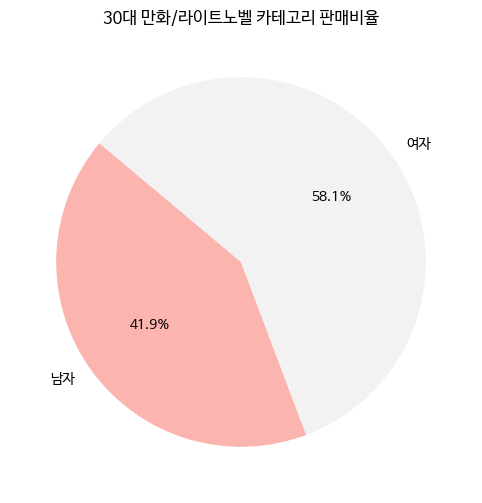

In [32]:
input_age = 30
input_cat = '만화/라이트노벨'
plot_sales_index_by_gender(df, input_age, input_cat)

In [27]:
def plot_sales_index_by_gender(df, input_age):
    # 나이대를 10단위로 매핑 (예: 15 -> 10, 25 -> 20)
    if input_age < 10:
        print("10대 이상의 나이를 입력해주세요")
        return
    elif input_age < 20:
        mapped_age = 10
    elif input_age < 30:
        mapped_age = 20
    elif input_age < 40:
        mapped_age = 30
    elif input_age < 50:
        mapped_age = 40
    elif input_age < 60:
        mapped_age = 50
    elif input_age < 120:
        mapped_age = 60
    else:
        print("올바른 나이를 입력해주세요.")
        return

    # 나이대 필터링
    age_filtered_df = df[df['Age'] == mapped_age]

    # 성별에 따른 Sales_Index 합계 계산
    sales_summary_by_gender = age_filtered_df.groupby('Gender')['Sales_Index'].sum()

    # 성별 라벨 설정
    gender_labels = ['남자', '여자']

    # 파이차트 그리기
    plt.figure(figsize=(8, 6))
    sales_summary_by_gender.plot.pie(labels=gender_labels, autopct='%1.1f%%', startangle=140, cmap='Pastel1')
    plt.title(f'{mapped_age}대{" 이상" if mapped_age == 60 else ""} 성별 도서 판매비율')
    plt.ylabel('')
    plt.show()

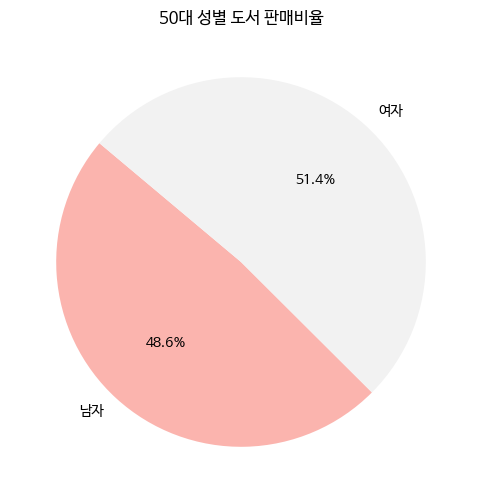

In [29]:
input_age = 50
plot_sales_index_by_gender(df, input_age)

Age             10          20          30          40          50          60
Gender                                                                        
0       315.714286  362.357955  342.130233  337.806306  325.148515  327.519231
1       294.340909  302.092784  317.901288  309.254237  317.102941  319.355263


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15144\4139821076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Pages'] = df_clean['Pages'].str.replace(',', '').astype(int)


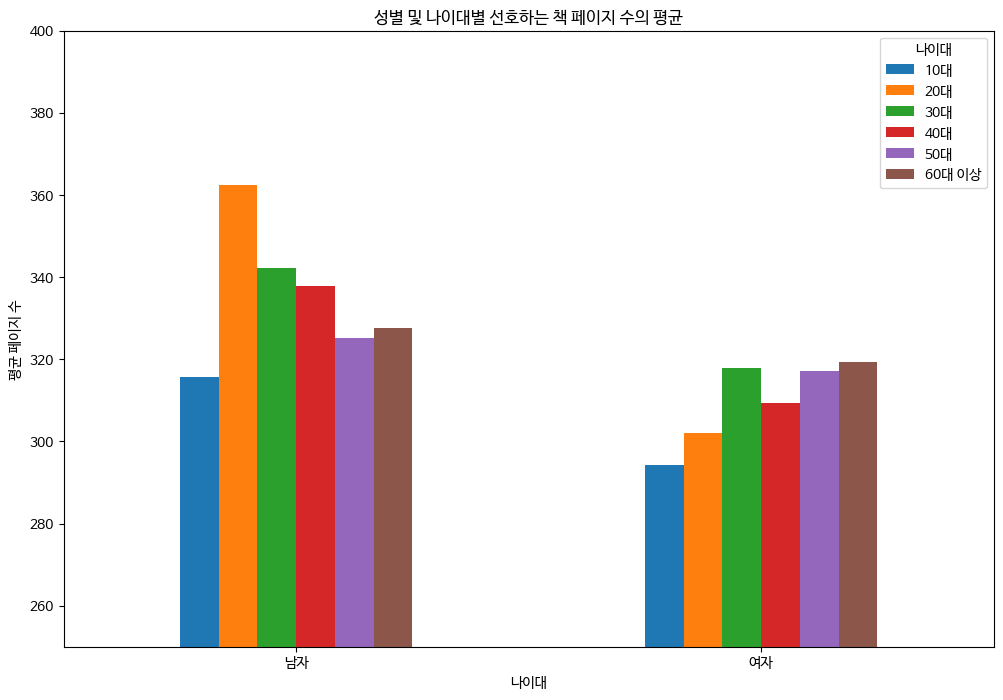

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# 페이지 수 결측값 제거 및 숫자형 변환
df_clean = df.dropna(subset=['Pages'])
df_clean['Pages'] = df_clean['Pages'].str.replace(',', '').astype(int)

# 성별 및 나이대별 페이지 수의 평균 계산
gender_age_page_mean = df_clean.groupby(['Gender', 'Age'])['Pages'].mean().unstack()

# 결과 확인
print(gender_age_page_mean)

# 성별 라벨 설정
gender_labels = ['남자', '여자']

# 바차트 그리기
ax = gender_age_page_mean.plot(kind='bar', figsize=(12, 8))

plt.title('성별 및 나이대별 선호하는 책 페이지 수의 평균')
plt.xlabel('나이대')
plt.ylabel('평균 페이지 수')
plt.ylim(250, 400)  # y축 범위를 9에서 10으로 설정
plt.xticks(ticks=range(len(gender_age_page_mean.index)), labels=['남자', '여자'], rotation=0)
plt.legend(title='나이대', labels=['10대', '20대', '30대', '40대', '50대', '60대 이상'])
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15144\3367071559.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Pages'] = df_clean['Pages'].str.replace(',', '').astype(int)


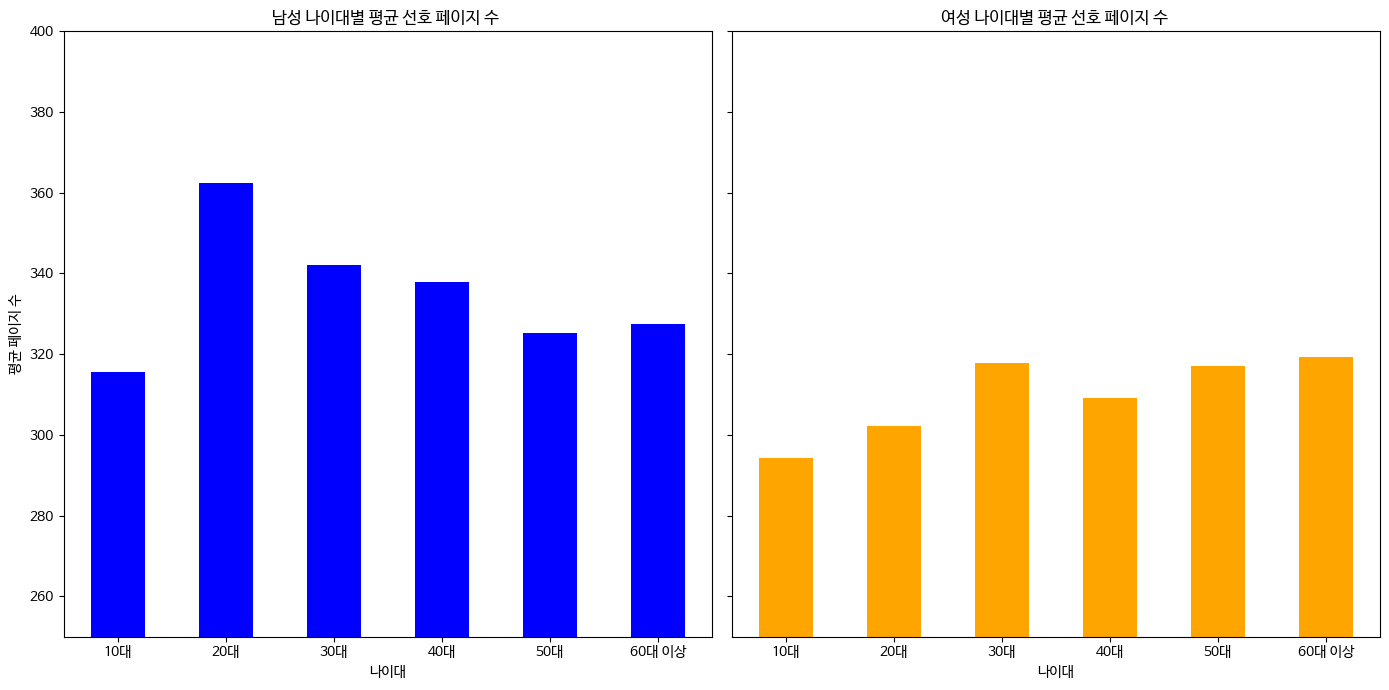

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


# 페이지 수 결측값 제거 및 숫자형 변환
df_clean = df.dropna(subset=['Pages'])
df_clean['Pages'] = df_clean['Pages'].str.replace(',', '').astype(int)

# 성별 및 나이대별 페이지 수의 평균 계산
gender_age_page_mean = df_clean.groupby(['Gender', 'Age'])['Pages'].mean().unstack()

# 바차트 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)\

gender_labels = {0: '남', 1: '여'}

for i, (gender, color) in enumerate(zip(gender_age_page_mean.index, ['blue', 'orange'])):
    ax = gender_age_page_mean.loc[gender].plot(kind='bar', ax=axes[i], color=color)
    ax.set_title(f'{gender_labels[gender]}성 나이대별 평균 선호 페이지 수')
    ax.set_xlabel('나이대')
    ax.set_ylabel('평균 페이지 수')
    ax.set_ylim(250, 400)  # y축 범위 설정
    ax.set_xticklabels(['10대', '20대', '30대', '40대', '50대', '60대 이상'],rotation=0)
plt.tight_layout()
plt.show()


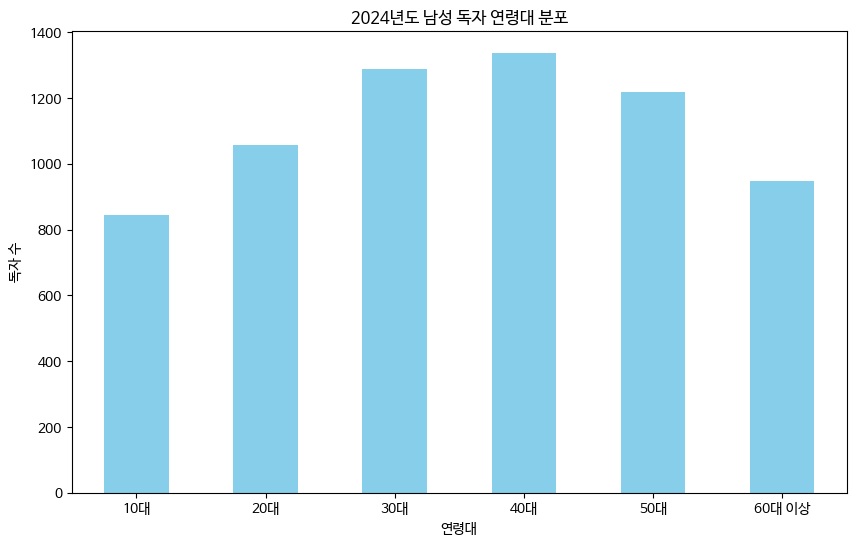

In [68]:
# 성별이 0인 (남성) 데이터 필터링
male_data = df[df['Gender'] == 0]

# 연령대별 카운트 계산
age_counts = male_data['Age'].value_counts().sort_index()

age_labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 바차트 그리기
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='skyblue')
plt.title('2024년도 남성 독자 연령대 분포')
plt.xlabel('연령대')
plt.ylabel('독자 수')
plt.xticks(range(len(age_labels)), age_labels, rotation=0)
plt.show()

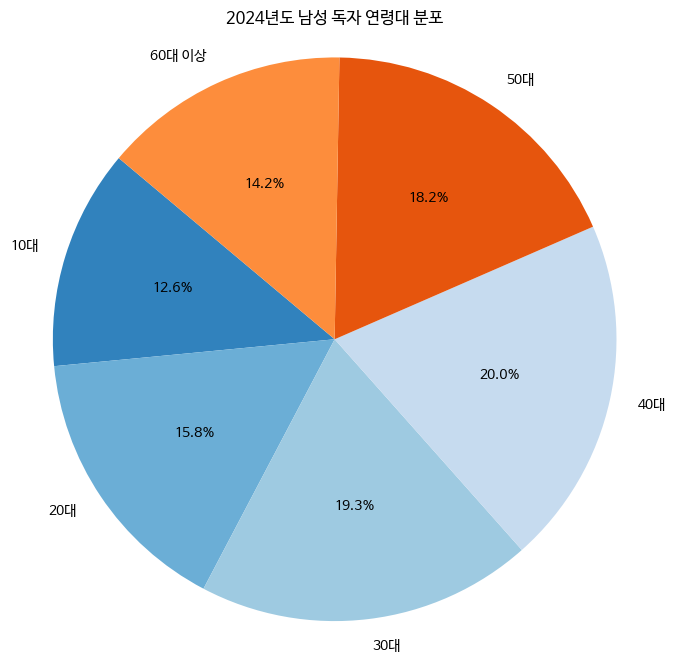

In [67]:
# 성별이 0인 (남성) 데이터 필터링
male_data = df[df['Gender'] == 0]

# 연령대별 카운트 계산
age_counts = male_data['Age'].value_counts().sort_index()

age_labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20c.colors)
plt.title('2024년도 남성 독자 연령대 분포')
plt.axis('equal')  # 원형으로 설정
plt.show()

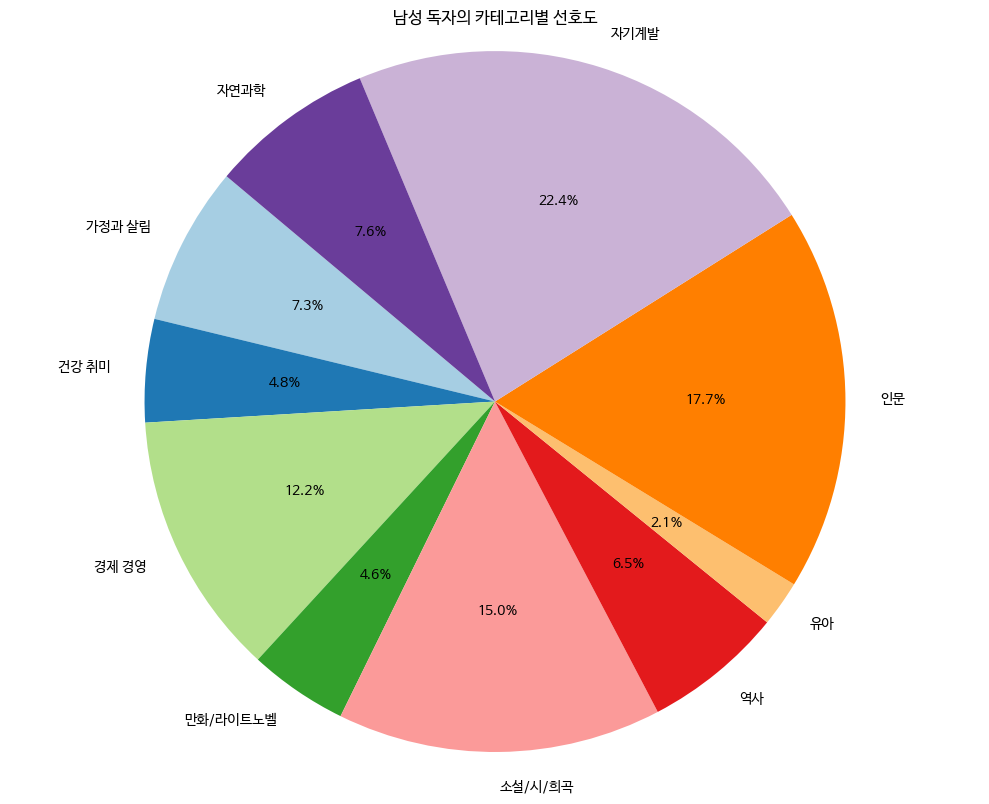

In [79]:
# 필터링: 성별이 0인 (남성) 데이터 필터링
male_data = df[df['Gender'] == 0]

# 각 카테고리별로 Sales_Index 합산
category_sales_sum = male_data.groupby('Category')['Sales_Index'].mean()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(category_sales_sum, labels=category_sales_sum.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('남성 독자의 카테고리별 선호도')
plt.axis('equal')  # 원형을 유지하기 위해
plt.tight_layout()
plt.show()

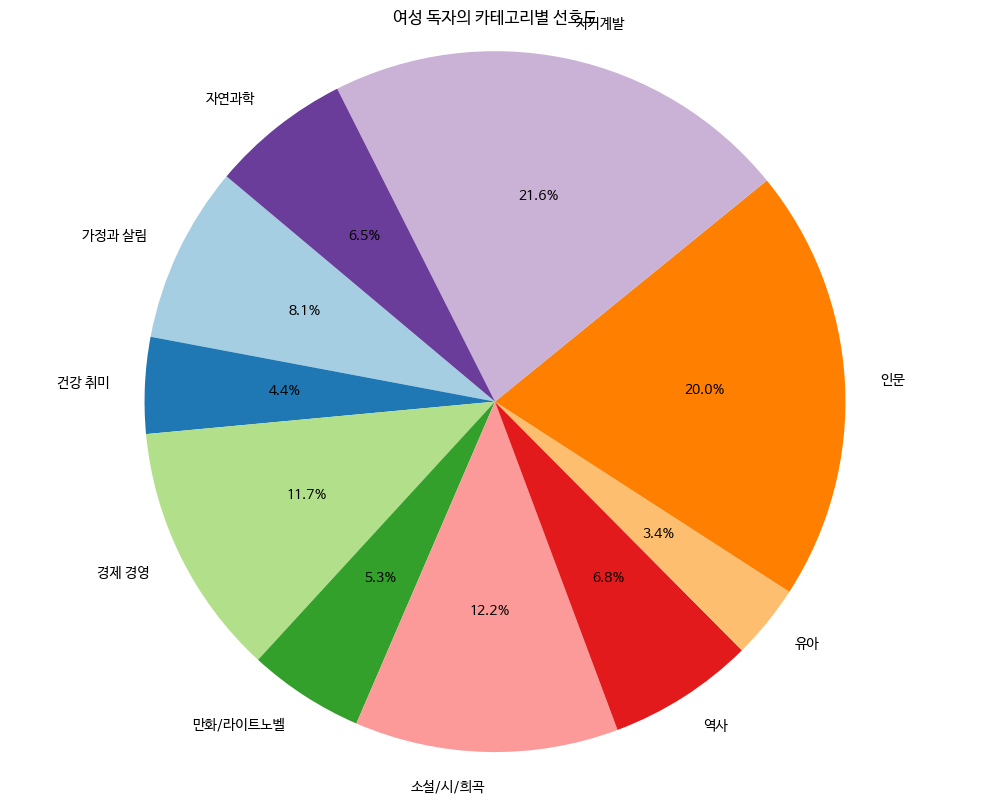

In [81]:
# 필터링: 성별이 0인 (남성) 데이터 필터링
male_data = df[df['Gender'] == 1]

# 각 카테고리별로 Sales_Index 합산
category_sales_sum = male_data.groupby('Category')['Sales_Index'].mean()

# 파이 차트 그리기
plt.figure(figsize=(10, 8))
plt.pie(category_sales_sum, labels=category_sales_sum.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('여성 독자의 카테고리별 선호도')
plt.axis('equal')  # 원형을 유지하기 위해
plt.tight_layout()
plt.show()